# **XGBoost Predictive Model for TikTok's Claim Classification: EDA, Hypothesis Testing, Logistic Regression, Tree-Based Models**

### 2nd Jupyter Notebook -- *Explanatory Data Analysis (EDA)* 

In [1]:
# Importing packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
data = pd.read_csv("tiktok-dataset.csv")

In [3]:
# Assessing the dataset
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [4]:
# Getting size and shape of the data
print('size:', data.size)
print('shape:', data.shape)

size: 232584
shape: (19382, 12)


In [5]:
# Displaying basic information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
# Descriptive statistics of dataset
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


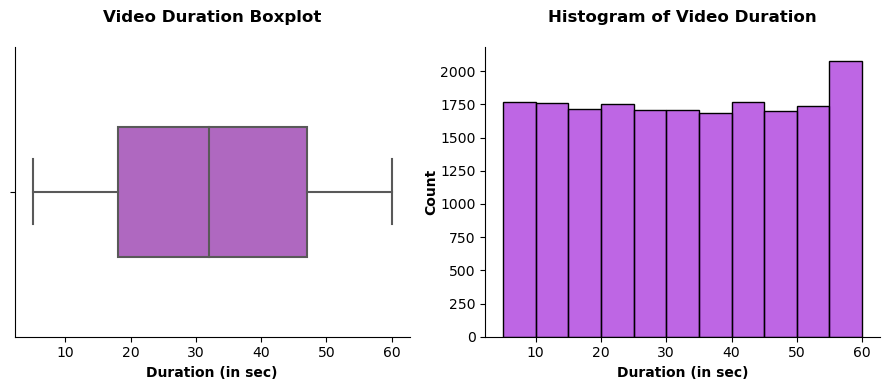

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (9, 4))

# Boxplot to display distribution of `video_duration_sec`
sns.boxplot(x = data['video_duration_sec'], width = 0.45, color = 'mediumorchid', 
            saturation = 0.7, ax = ax[0])
ax[0].set_xlabel('Duration (in sec)', fontweight = 'bold')
ax[0].set_title('Video Duration Boxplot', fontweight = 'bold', pad = 18)


# Creating histogram to further explore this variable's distribution
sns.histplot(data['video_duration_sec'], binwidth = 5, 
             color = 'darkviolet', alpha = 0.6, ax = ax[1])
ax[1].set_title('Histogram of Video Duration', fontweight = 'bold', pad = 18)
ax[1].set_xlabel('Duration (in sec)', fontweight = 'bold')
ax[1].set_ylabel('Count', fontweight = 'bold', labelpad = 1)

fig.tight_layout()
sns.despine()
plt.savefig("Video-Duration Boxplot and Histogram.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- Videos are 5-60 seconds in length, and the distribution is uniform.

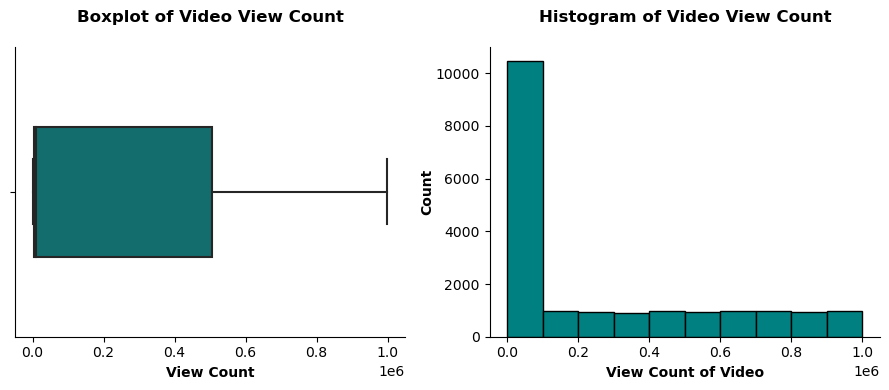

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (9, 4))

# Boxplot for `video_view_count` distribution
sns.boxplot(x = data['video_view_count'], width = 0.45, color = 'teal', 
            saturation = 0.7, ax = ax[0])
ax[0].set_xlabel('View Count', fontweight = 'bold')
ax[0].set_title('Boxplot of Video View Count', fontweight = 'bold', pad = 18)

# Creating histogram
sns.histplot(data['video_view_count'], bins = range(0,(10**6+1),10**5), 
             color = 'teal', alpha = 1, ax = ax[1])
ax[1].set_title('Histogram of Video View Count', fontweight = 'bold', pad = 18)
ax[1].set_xlabel('View Count of Video', fontweight = 'bold')
ax[1].set_ylabel('Count', fontweight = 'bold', labelpad = 1)

fig.tight_layout()
sns.despine()
plt.savefig("Video-View-Count-Boxplot-and-Histogram.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- This variable has a very **uneven distribution**. 
- More than half of videos receives fewer than 100,000 views. 
- For view counts > 100,000, distribution is uniform.

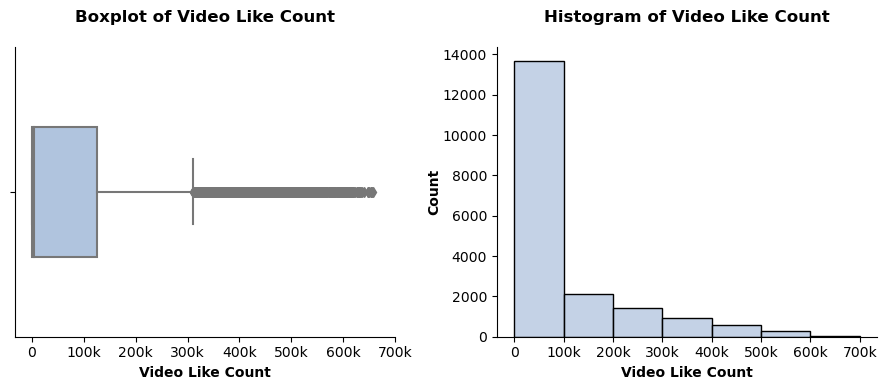

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (9, 4))

# Boxplot for `video_like_count` distribution
sns.boxplot(x = data['video_like_count'], width = 0.45,
            color = 'lightsteelblue', saturation = 1, ax = ax[0])
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax[0].set_xticks(range(0,7*10**5+1,10**5))
ax[0].set_xticklabels(labels)
ax[0].set_xlabel('Video Like Count', fontweight = 'bold')
ax[0].set_title('Boxplot of Video Like Count', fontweight = 'bold', pad = 18)

# Creating `video_like_count` histogram
sns.histplot(data['video_like_count'], bins = range(0,(7*10**5+1),10**5), 
             color = 'lightsteelblue', ax = ax[1])
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax[1].set_xticks(range(0,7*10**5+1,10**5))
ax[1].set_xticklabels(labels)
ax[1].set_xlabel('Video Like Count', fontweight = 'bold')
ax[1].set_ylabel('Count', fontweight = 'bold', labelpad = 1)
ax[1].set_title('Histogram of Video Like Count', fontweight = 'bold', pad = 18)

fig.tight_layout()
sns.despine()
plt.savefig("Video-Like-Count-Boxplot-and-Histogram.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- Majority of videos get < 100,000 likes. 
- This variable also has very **uneven distribution**. The data is **right-skewed**.

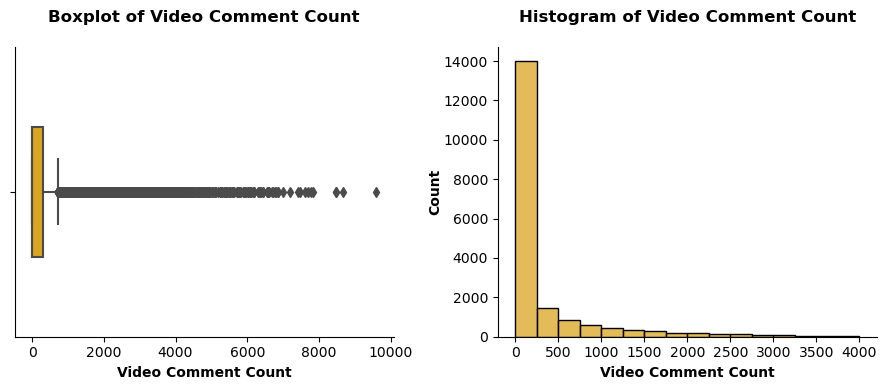

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (9, 4))

# Boxplot of `video_comment_count` distribution
sns.boxplot(x = data['video_comment_count'], width = 0.45, 
            color = 'goldenrod', saturation = 1, ax = ax[0])
ax[0].set_xlabel('Video Comment Count', fontweight = 'bold')
ax[0].set_title('Boxplot of Video Comment Count', fontweight = 'bold', pad = 18)

# Making its histogram
sns.histplot(data['video_comment_count'], bins= range(0, 4001, 250), 
             color = 'goldenrod', ax = ax[1])
ax[1].set_title('Histogram of Video Comment Count', fontweight = 'bold', pad = 18)
ax[1].set_xlabel('Video Comment Count', fontweight = 'bold')
ax[1].set_ylabel('Count', fontweight = 'bold', labelpad = 1)

fig.tight_layout()
sns.despine()
plt.savefig("Video-Comment-Count-Boxplot-and-Histogram.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- Vast majority of videos are at the bottom of the range for video comment count. 
- Most videos have fewer than 250 comments. The distribution is very **right-skewed**.

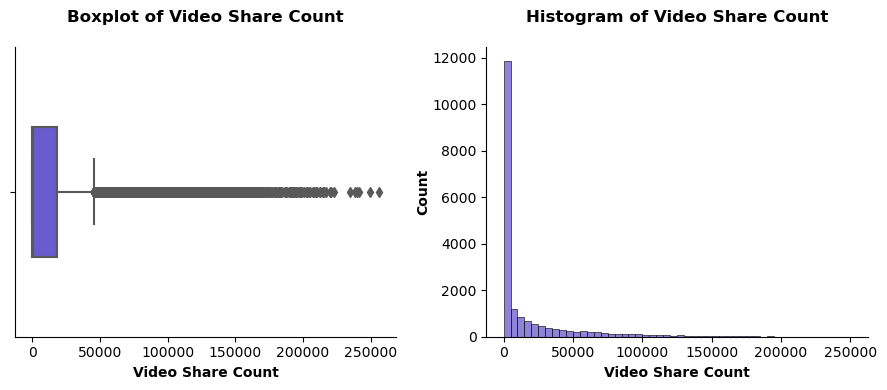

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (9, 4))

# Boxplot of `video_share_count`
sns.boxplot(x = data['video_share_count'], width = 0.45, 
            color = 'slateblue', saturation = 1, ax = ax[0])
ax[0].set_xlabel('Video Share Count', fontweight = 'bold')
ax[0].set_title('Boxplot of Video Share Count', fontweight = 'bold', pad = 18)

# Histogram of `video_share_count`
sns.histplot(data['video_share_count'], bins= range(0, 250001, 5000), 
             color = 'slateblue', ax = ax[1])
ax[1].set_title('Histogram of Video Share Count', fontweight = 'bold', pad = 18)
ax[1].set_xlabel('Video Share Count', fontweight = 'bold',)
ax[1].set_ylabel('Count', fontweight = 'bold', labelpad = 1)

fig.tight_layout()
sns.despine()
plt.savefig("Video-Share-Count-Boxplot-and-Histogram.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- The majority of videos had fewer than 50,000 shares. 
- The distribution is very **skewed to the right**.

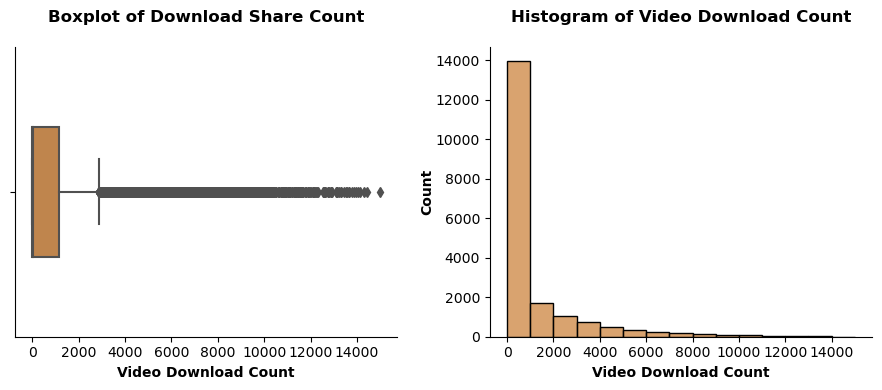

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (9, 4))

# Boxplot of `video_download_count`
sns.boxplot(x = data['video_download_count'], width = 0.45, 
            color = 'peru', saturation = 0.8, ax = ax[0])
ax[0].set_xlabel('Video Download Count', fontweight = 'bold')
ax[0].set_title('Boxplot of Download Share Count', fontweight = 'bold', pad = 18)

# Creating its histogram
sns.histplot(data['video_download_count'], bins= range(0, 15001, 1000), 
             color = 'peru', ax = ax[1])
ax[1].set_title('Histogram of Video Download Count', fontweight = 'bold', pad = 18)
ax[1].set_xlabel('Video Download Count', fontweight = 'bold')
ax[1].set_ylabel('Count', fontweight = 'bold', labelpad = 1)

fig.tight_layout()
sns.despine()
plt.savefig("Video-Download-Count-Boxplot-and-Histogram.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- The majority of videos were downloaded fewer than 1000 times. 
- Again, the data is very **skewed to the right**.

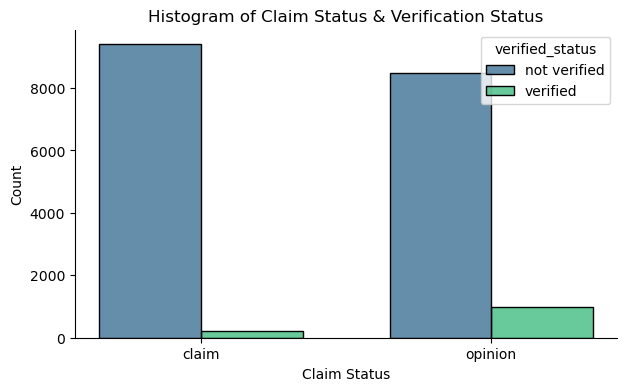

In [13]:
# Creating histogram
plt.figure(figsize = (7, 4))
sns.histplot(data = data, x = 'claim_status', hue = 'verified_status', multiple = 'dodge', shrink = 0.7,
             palette = 'viridis')
plt.title('Histogram of Claim Status & Verification Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')

sns.despine()
plt.savefig("Claim-Verification-Status-Histogram.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- There are significantly fewer verified users than unverified users. 
- **Verified users are much more likely to post opinions.**

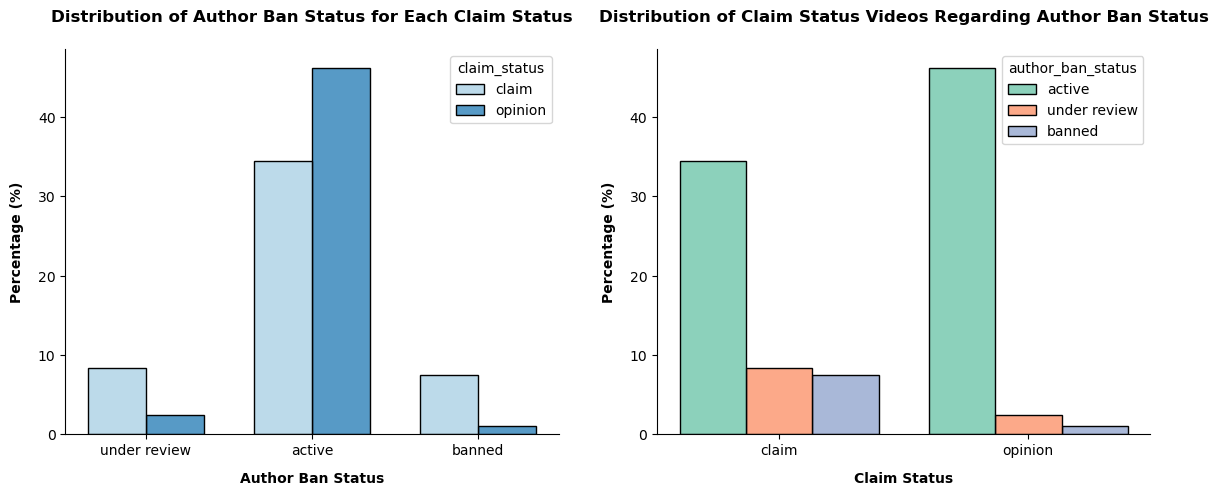

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

# Creating histogram
sns.histplot(data = data, x = 'author_ban_status', hue = 'claim_status', stat = 'percent',
             multiple = 'dodge', shrink = 0.7,
             palette = 'Paired', ax = ax[0])
ax[0].set_title('Distribution of Author Ban Status for Each Claim Status', 
                fontweight = 'bold', pad = 20)
ax[0].set_xlabel('Author Ban Status', fontweight = 'bold', labelpad = 10)
ax[0].set_ylabel('Percentage (%)', fontweight = 'bold', labelpad = 10)


# Creating 2nd histogram
sns.histplot(data = data, x = 'claim_status', hue = 'author_ban_status', stat = 'percent',
             hue_order = ['active', 'under review', 'banned'], multiple = 'dodge', 
             shrink = 0.8, palette = 'Set2', ax = ax[1])
ax[1].set_title('Distribution of Claim Status Videos Regarding Author Ban Status',
                fontweight = 'bold', pad = 20)
ax[1].set_xlabel('Claim Status', fontweight = 'bold', labelpad = 10)
ax[1].set_ylabel('Percentage (%)', fontweight = 'bold', labelpad = 10)


sns.despine()
plt.savefig("Author-Ban-Status-vs-Claim-Status-Distributions.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
1) For both claims and opinions, there are more active authors than banned authors or authors under review.
2) **The proportion of active authors is far greater for opinion videos than for claim videos**. 
3) It looks likely that **authors who post claim videos are under review and/or get banned**.

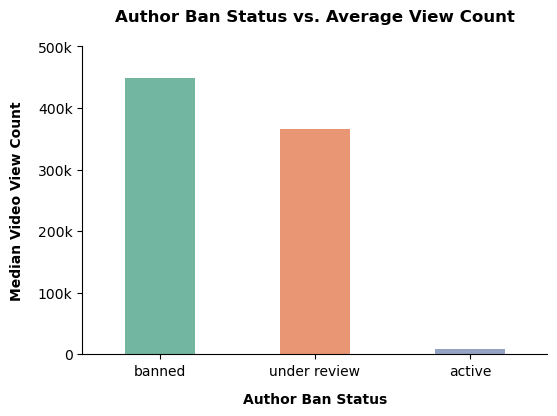

In [15]:
# Creating bar plot
ban_status_count = data.groupby(['author_ban_status']).median(numeric_only = True).reset_index()

plt.figure(figsize = (6,4))
sns.barplot(data = ban_status_count, x = 'author_ban_status', y = 'video_view_count', 
            order = ['banned', 'under review', 'active' ],
            palette = 'Set2', width = 0.45)
plt.title('Author Ban Status vs. Average View Count', fontweight = 'bold', pad = 18)
plt.xlabel('Author Ban Status', fontweight = 'bold', labelpad = 10)
plt.ylabel('Median Video View Count', fontweight = 'bold', labelpad = 10)
label = [0] + [str(i) + 'k' for i in range(100, 501, 100)]
plt.yticks(range(0,5*10**5+1,10**5), labels = label)

sns.despine()
plt.savefig("Author-Ban-Status-vs-Avg-View-Count.png", dpi = 300, bbox_inches = 'tight')
plt.show()

Remarks:
1) **Median view counts for non-active authors are much greater than active authors' median view count**. 
2) Since non-active authors are more likely to post claims (see above), and non-active authors gets more views than active authors; thus, **video_view_count can be a adequate indicator of claim status.**

In [16]:
# To verify remark made above:
data.groupby(['claim_status'])['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

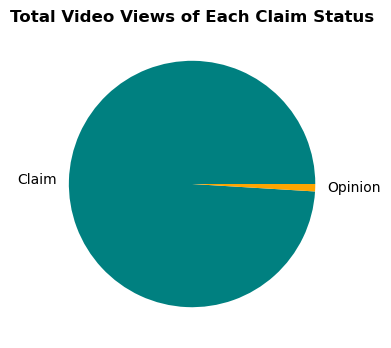

In [17]:
# Creating pie graph
fig = plt.figure(figsize = (4,4))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels = ['Claim', 'Opinion'], 
        colors = ['teal', 'orange'])
plt.title('Total Video Views of Each Claim Status', fontweight = 'bold')
plt.savefig("Distribution-of-Total-Views-vs-Claim-Status.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- **Claim videos hugely dominates overall view count** in spite of approximately same number of each video in the dataset.

### Checking for outliers

*Outliers:*
1) While building predictive models, outliers can be problem. 
For instance, if you want to predict view count, **videos with extremely high view can introduce bias to model**. 
2) Some outliers might indicate problems about data capturing or recording.

*Detecting Outliers:*
1) The outlier definition changes based on project details, also domain expertise helps decide on threshold. 

2) Common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is **1.5 * IQR above the 3rd quartile**.
In this dataset, the values for count variables are NOT normally distributed. They are **heavily skewed to the right**.

3) One way of modifying outlier threshold is finding median value for each variable and then adding 1.5 * IQR. 
4) In this case, this threshold is much lower than it would be if 3rd quartile was used.

In [18]:
count_columns = ['video_view_count', 'video_like_count', 'video_share_count', 
               'video_download_count', 'video_comment_count']

for column in count_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    median = data[column].median()
    outlier_threshold = median + 1.5*IQR
    
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


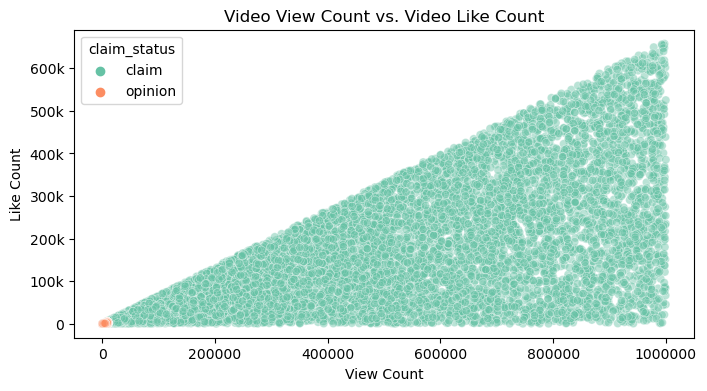

In [19]:
# Scatterplot of `video_view_count` vs. `video_like_count` according to 'claim_status'

plt.figure(figsize = (8,4))
sns.scatterplot(x = data['video_view_count'], y = data['video_like_count'],
               hue = data['claim_status'], palette = 'Set2', alpha = 0.45)
plt.title('Video View Count vs. Video Like Count')
plt.xlabel('View Count')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.ylabel('Like Count')
label = [0] + [str(i) + 'k' for i in range(100, 601, 100)]
plt.yticks(range(0,6*10**5+1,10**5), labels = label)

plt.savefig("Video-View-Count-vs-Like-Count-Claim-Status.png", dpi = 300, bbox_inches = 'tight')
plt.show()

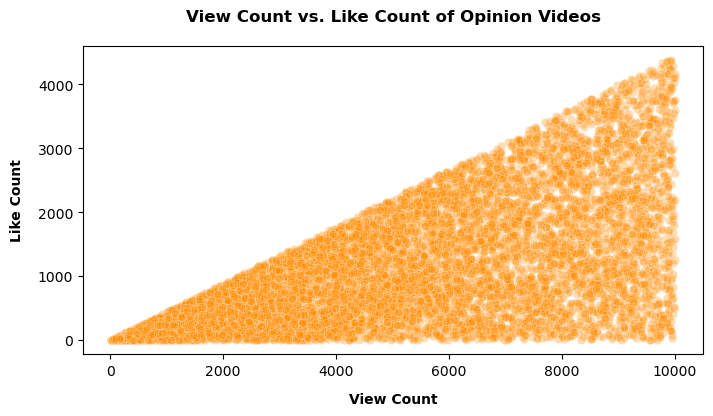

In [20]:
# Scatterplot of ``video_view_count` vs. `video_like_count` for opinions videos
data_opinions = data[data['claim_status'] == 'opinion']

plt.figure(figsize = (8,4))
sns.scatterplot(x = data_opinions['video_view_count'], y = data_opinions['video_like_count'], 
                color = 'darkorange', alpha = 0.30)
plt.title('View Count vs. Like Count of Opinion Videos', fontweight = 'bold', pad = 18)
plt.xlabel('View Count', fontweight = 'bold', labelpad = 10)
plt.ylabel('Like Count', fontweight = 'bold', labelpad = 10)

plt.savefig("Video-View-Count-vs-Like-Count-Opinion.png", dpi = 300, bbox_inches = 'tight')
plt.show()

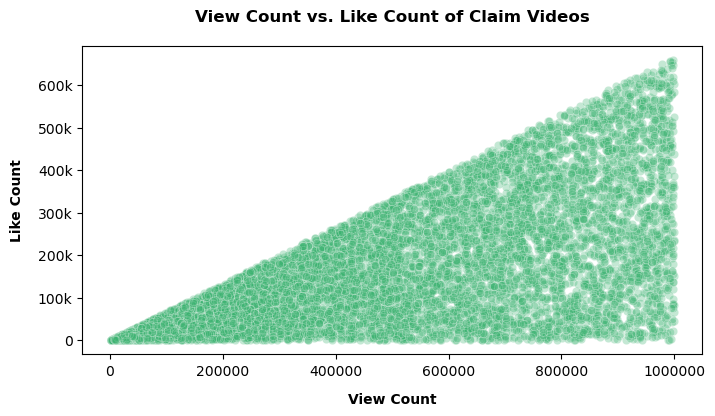

In [21]:
# Scatterplot of ``video_view_count` vs. `video_like_count` for opinions videos
data_opinions = data[data['claim_status'] == 'claim']

plt.figure(figsize = (8,4))
sns.scatterplot(x = data_opinions['video_view_count'], y = data_opinions['video_like_count'], 
                color = 'mediumseagreen', alpha = 0.30)
plt.title('View Count vs. Like Count of Claim Videos', fontweight = 'bold', pad = 18)
plt.xlabel('View Count', fontweight = 'bold', labelpad = 10)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.ylabel('Like Count', fontweight = 'bold', labelpad = 10)

label_y = [0] + [str(i) + 'k' for i in range(100, 601, 100)]
plt.yticks(range(0,6*10**5+1,10**5), labels = label_y)

plt.savefig("Video-View-Count-vs-Like-Count-Claim.png", dpi = 300, bbox_inches = 'tight')
plt.show()